# Exercise 2.1: algorithm runtimes.
The dataset stored in runtimes.csv contains information on the runtime of two algorithms (a serial version and a distributed version) on test problems of dierent size (measured in pixels), and for various numbers of worker threads (for the distributed version).


### 1. Create a chart that examines how fast runtime increases with problem size, for the single and distributed versions, and for different numbers of threads for the latter.


In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random
from scipy.interpolate import griddata

In [3]:
#loading the dataset

df = pd.read_csv('runtimes.csv', comment = "#")

print(df.head())


   size  workers      time         algo
0  4096        1  3.736606  distributed
1  4096        2  2.133074  distributed
2  4096        3  1.673441  distributed
3  4096        4  1.515788  distributed
4  4096        5  1.475265  distributed


In [4]:
#checking for null values
df.isnull().sum()

size       0
workers    0
time       0
algo       0
dtype: int64

In [5]:
#filter data for single and distributed algorithm

df_single = df[df['algo'] == 'single']
df_distributed = df[df['algo'] == 'distributed']


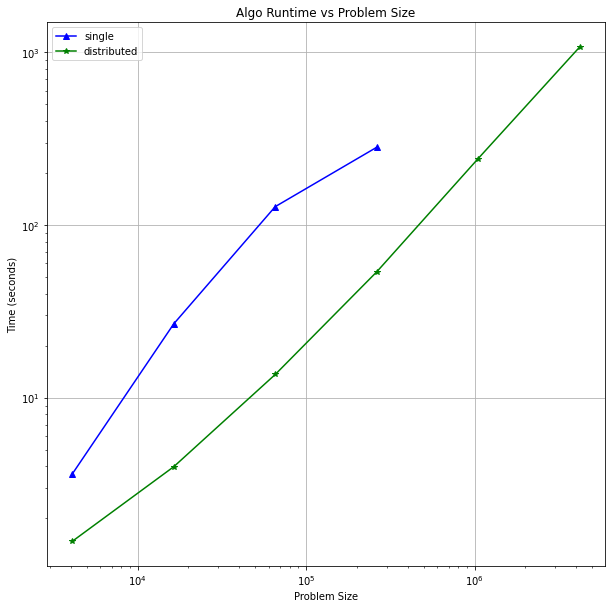

In [6]:
#Create a chart that examines how fast runtime increases with problem size, for the single and distributed versions
fig, ax1 = plt.subplots(figsize=(10, 10))

colors = ['blue', 'green']  
markers = ['^','*']

# Plot for Single-threaded runtime vs Problem Size
for algo_type, color, marker in zip(['single', 'distributed'], colors, markers):
    subset = df[df['algo'] == algo_type]
    
    # Use minimum runtime for each size if multiple entries per size and algo
    subset = subset.groupby(['size', 'algo'])['time'].min().reset_index()
    ax1.plot(subset['size'], subset['time'], marker=marker, linestyle='-', color=color, label=algo_type)

ax1.set_title('Algo Runtime vs Problem Size')
ax1.set_xlabel('Problem Size')
ax1.set_ylabel('Time (seconds)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True)


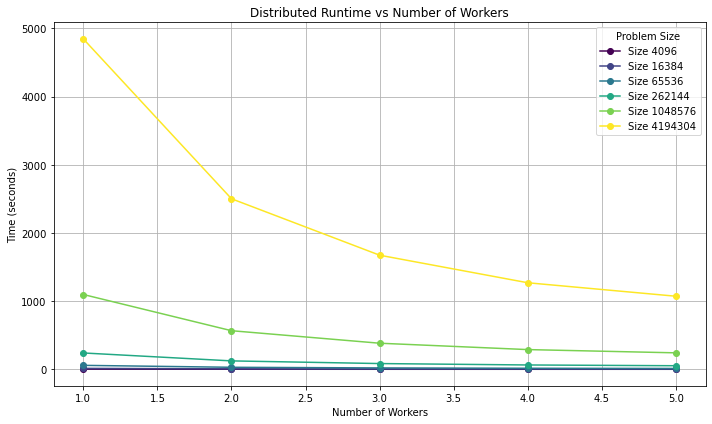

In [7]:
fig, ax2 = plt.subplots(figsize=(10, 6))

#Different colors for each problem size using a colormap
problem_sizes = df_distributed['size'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(problem_sizes)))


# Plot distributed runtime by number of workers for each problem size
for size, color in zip(sorted(problem_sizes), colors):
    subset = df_distributed[df_distributed['size'] == size]
    ax2.plot(subset['workers'], subset['time'], 'o-', label=f'Size {size}', color=color)

ax2.set_title('Distributed Runtime vs Number of Workers')
ax2.set_xlabel('Number of Workers')
ax2.set_ylabel('Time (seconds)')
ax2.legend(title='Problem Size')
ax2.grid(True)

plt.tight_layout()
plt.show()

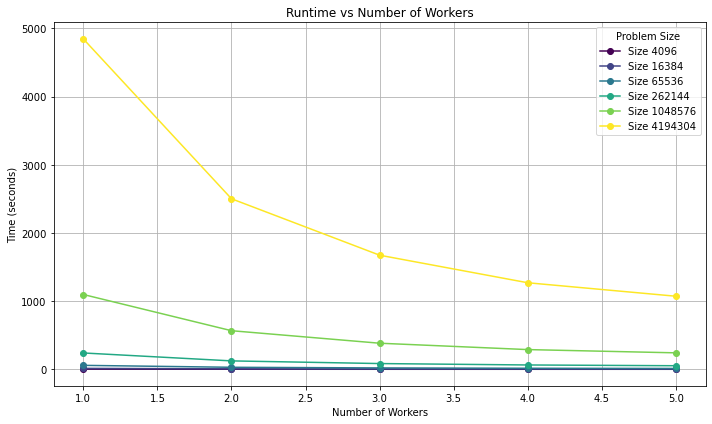

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique problem sizes
problem_sizes = df_distributed['size'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(problem_sizes)))  # Color map for visibility

for size, color in zip(sorted(problem_sizes), colors):
    subset = df_distributed[df_distributed['size'] == size]
    # Plot actual data
    ax.plot(subset['workers'], subset['time'], 'o-', label=f'Size {size}', color=color)

ax.set_title('Runtime vs Number of Workers')
ax.set_xlabel('Number of Workers')
ax.set_ylabel('Time (seconds)')
ax.legend(title = "Problem Size")
ax.grid(True)

plt.tight_layout()
plt.show()


# Exercise 2.2: precipitation data.
In this exercise we process precipitation data of the Deutscher Wetterdienst (DWD). The original data is available at https://www.dwd.de/DE/leistungen/cdc/cdc_ueberblick-klimadate n.html, but all data required for the exercise is already provided in the zip file of the problem sheet.


### 1. The file zehn_min_rr_Beschreibung_Stationen.txt (as available on the DWD website) contains basic information about the weather measurement stations. Its format should be self-explanatory. Convert it into reasonable CSV format. As a warmup, create a scatter plot of the geographical position of all weather stations and their elevation.


In [9]:
# Open the text file and read its contents
with open('zehn_min_rr_Beschreibung_Stationen.txt', 'r', encoding = 'latin-1') as file:
    lines = file.readlines()
    print(lines[:10])


['Stations_id von_datum bis_datum Stationshoehe geoBreite geoLaenge Stationsname Bundesland\n', '----------- --------- --------- ------------- --------- --------- ----------------------------------------- ----------\n', '00020 20040812 20240422            432     48.9219    9.9129 Abtsgmünd-Untergröningen                                                         Baden-Württemberg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [10]:

# Extracting column headers from the first line
headers = lines[0].split()


data = []
for line in lines[2:]:
    parts = line.split(maxsplit = len(headers)-1)
    
    data.append(parts)

# Writing the extracted data into a CSV file
with open('zehn_min_rr_Beschreibung_Stationen.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    writer.writerows(data)

In [11]:
#reading csv_file 
df = pd.read_csv('zehn_min_rr_Beschreibung_Stationen.csv')
print(df.head())
print("\nNo. of rows in the dataset:", df.shape[0])

   Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  geoLaenge  \
0           20   20040812   20240422            432    48.9219     9.9129   
1           44   20070208   20240422             44    52.9336     8.2370   
2           53   20050831   20240422             60    52.5850    13.5634   
3           73   20070213   20240422            374    48.6183    13.0620   
4           78   20041010   20240422             64    52.4853     7.9125   

               Stationsname                                         Bundesland  
0  Abtsgmünd-Untergröningen  Baden-Württemberg                             ...  
1              Großenkneten  Niedersachsen                                 ...  
2               Ahrensfelde  Brandenburg                                   ...  
3     Aldersbach-Kramersepp  Bayern                                        ...  
4                 Alfhausen  Niedersachsen                                 ...  

No. of rows in the dataset: 1068


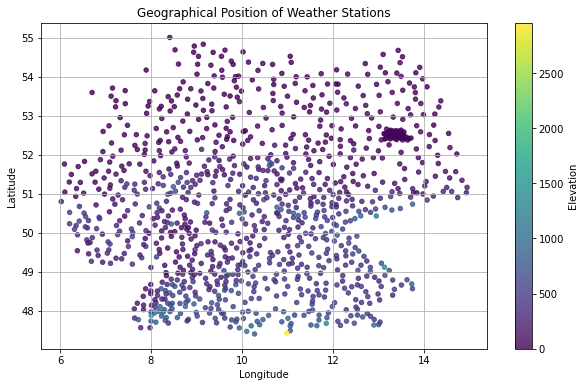

In [102]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['geoLaenge'], df['geoBreite'], c = df['Stationshoehe'], s = 20, alpha = 0.8)
plt.colorbar(label = 'Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Position of Weather Stations')
plt.grid(True)
plt.show()


### 2. The file 10min_processed.csv contains condensed precipitation data for the day 2024- 04-20 in intervals of 10 minutes for (a subset of) the weather stations listed above. The column stationid corresponds to the column Stations_id in the other table. The column date indicates the beginning of the 10 minute interval in the format YYYYMMDDHHMM. The column rain encodes precipitation in this interval in millimeters, missing values are encoded as -999.

In [130]:
#loading 10min_processed.csv file

min_Processed = pd.read_csv('10min_processed.csv')
min_Processed.rename(columns={'stationid': 'Stations_id'}, inplace=True)

In [131]:
#convert the date column to datetime format
min_Processed['date'] = pd.to_datetime(min_Processed['date'], format='%Y%m%d%H%M')

# Extract the hour part of the 'date' column
min_Processed['hour'] = df_min_Processed['date'].dt.hour

In [132]:
# replace missing values encoded as '-999' to zero
min_Processed['rain'] = df_min_Processed['rain'].apply(lambda x: max(x, 0))


In [137]:
min_Processed_grouped = min_Processed.groupby(['Stations_id', 'hour'])

In [139]:
# Sum the rain values within each hour
hourly_precipitation = min_Processed_grouped['rain'].sum().reset_index()


In [140]:
# merge the two data frames to get the locations of each station from the first data frame
df_min_Processed_merged = hourly_precipitation.merge(df[['Stations_id', 'geoBreite', 'geoLaenge']], how='left', on='Stations_id')


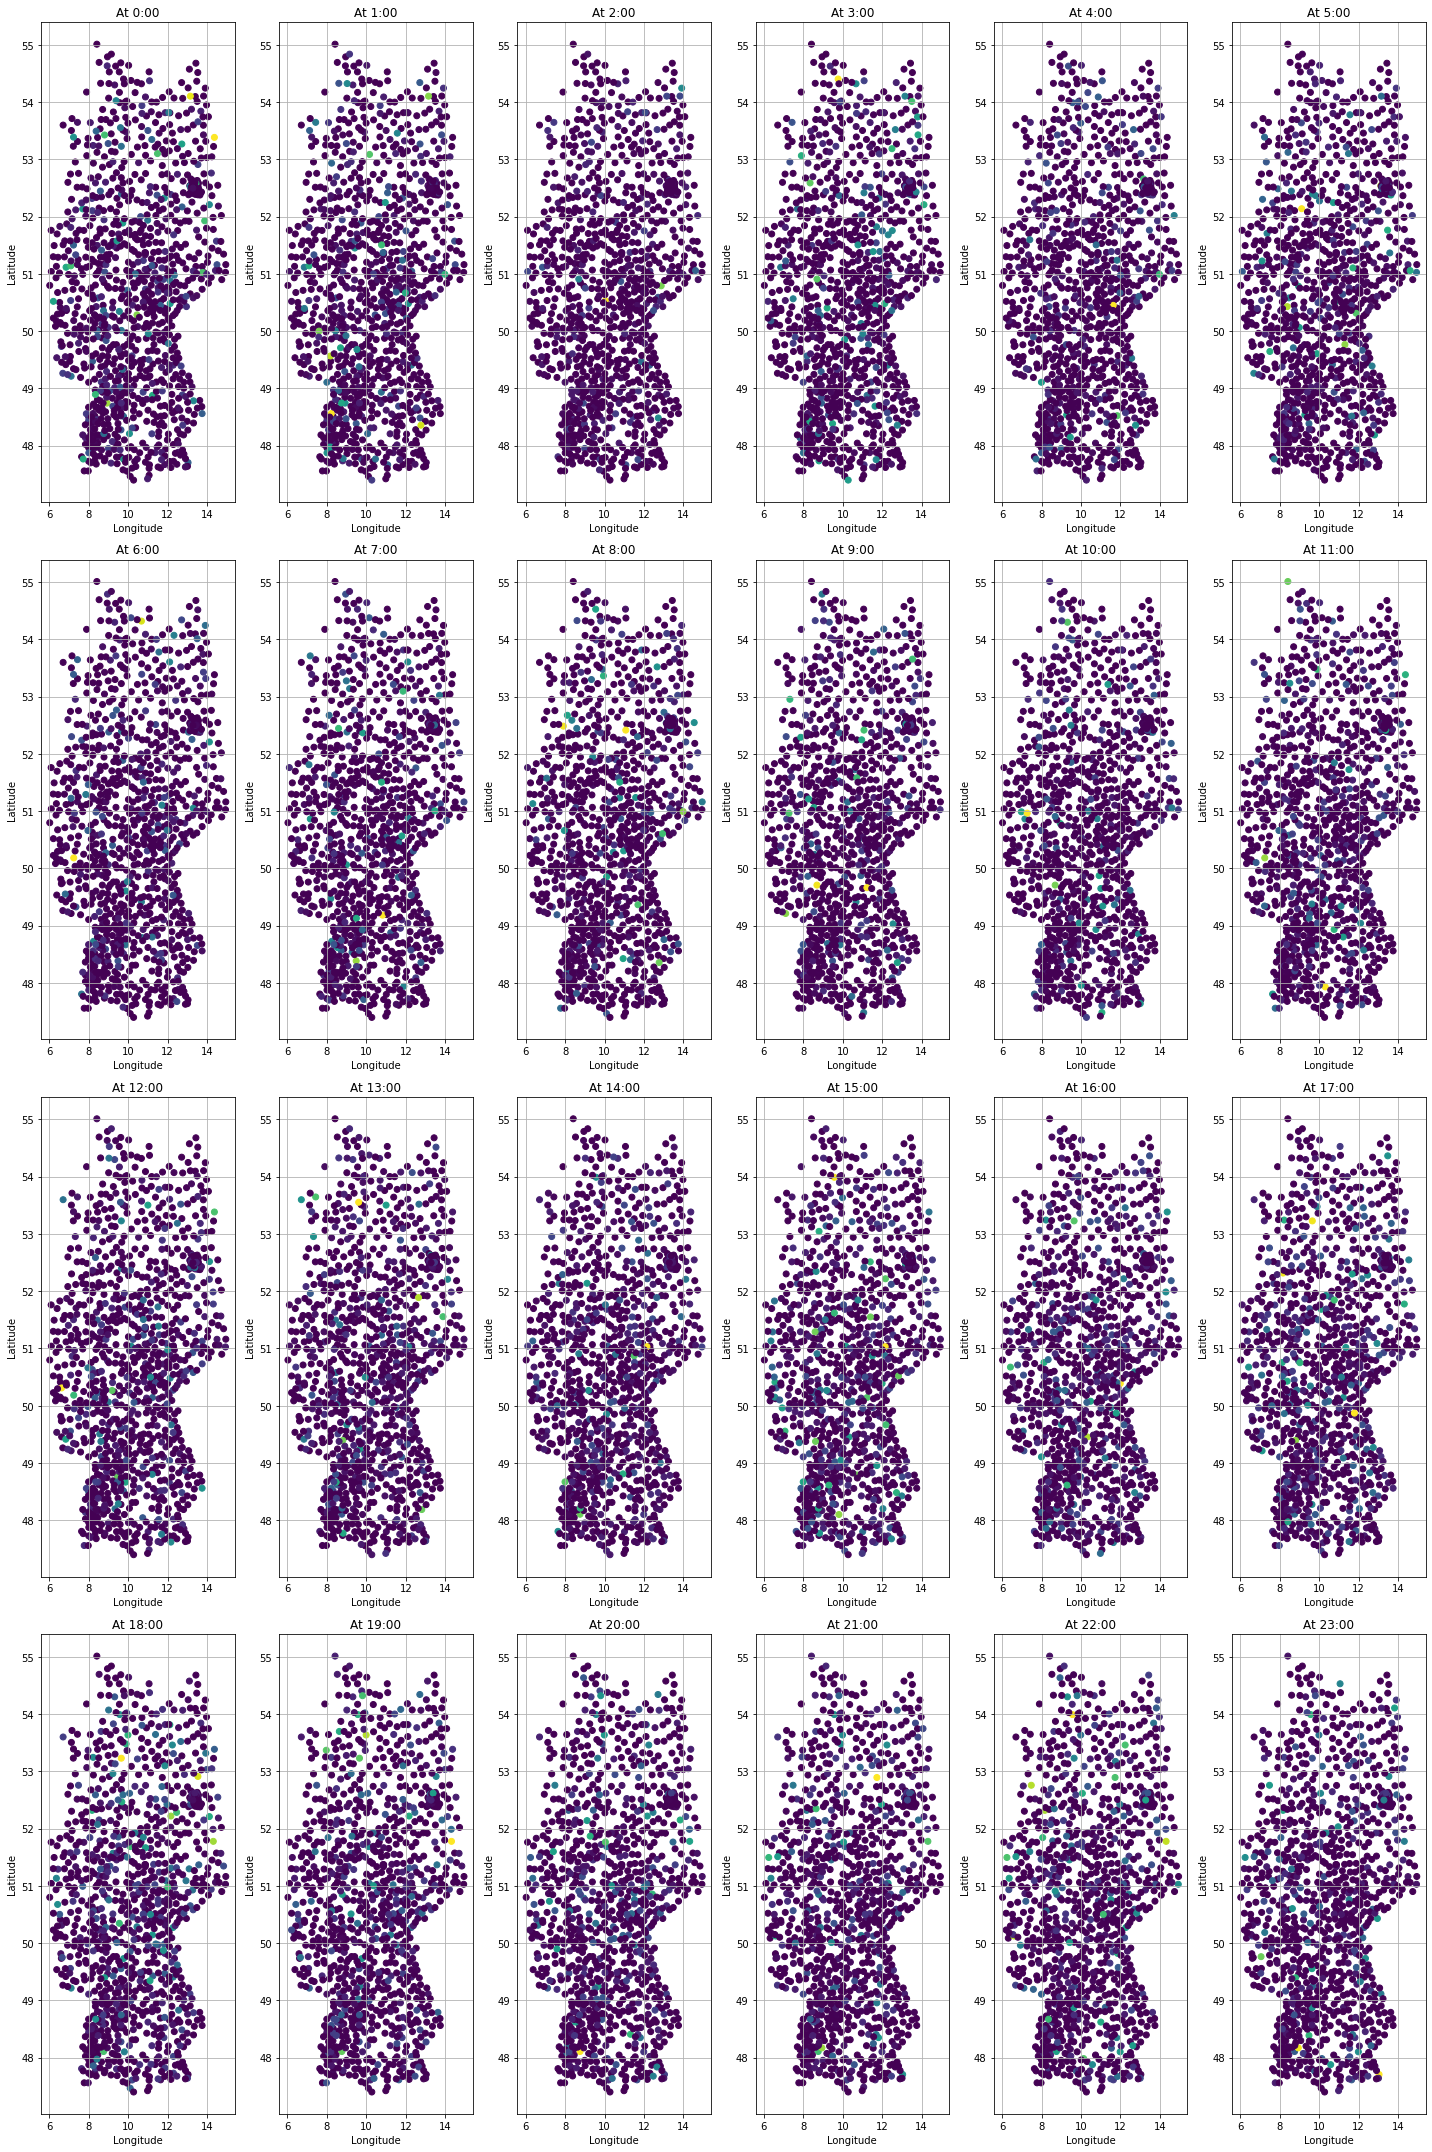

In [164]:
# Set up a larger figure to accommodate multiple subplots
fig, axs = plt.subplots(4, 6, figsize=(20, 30))

# Create a subplot for each selected hour
for hour in range(24):
    hour_data = df_min_Processed_merged[df_min_Processed_merged['hour'] == hour]
                        
    ax = axs.flatten()[hour]                   
    
    # Create a subplot (2 rows, 2 columns)
    scatter = ax.scatter(hour_data['geoLaenge'], hour_data['geoBreite'], c=hour_data['rain'], cmap='viridis')
    ax.set_title(f'At {hour}:00')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
                        


# Show the plots
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


# 3. The file griddata.npz contains the arrays geolat, geolong and ind. The two former arrays contain latitude and longitude positions of a regular rectangular Cartesian grid covering the measurement area, the third array contains an approximate binary indicator of the region covered by the measurements (with True indicating coverage). Interpolate the above precipitation data from the weather stations to this grid (only to the region indicated by ind) and display the data as an image. This gives a smoother visual impression of the geographical distribution of precipitation. Do this for all hours of the day as a small multiple.

In [170]:
# load grid data

with np.load('griddata.npz') as df:
    geolat = df['geolat']
    geolong = df['geolong']
    ind = df['ind']


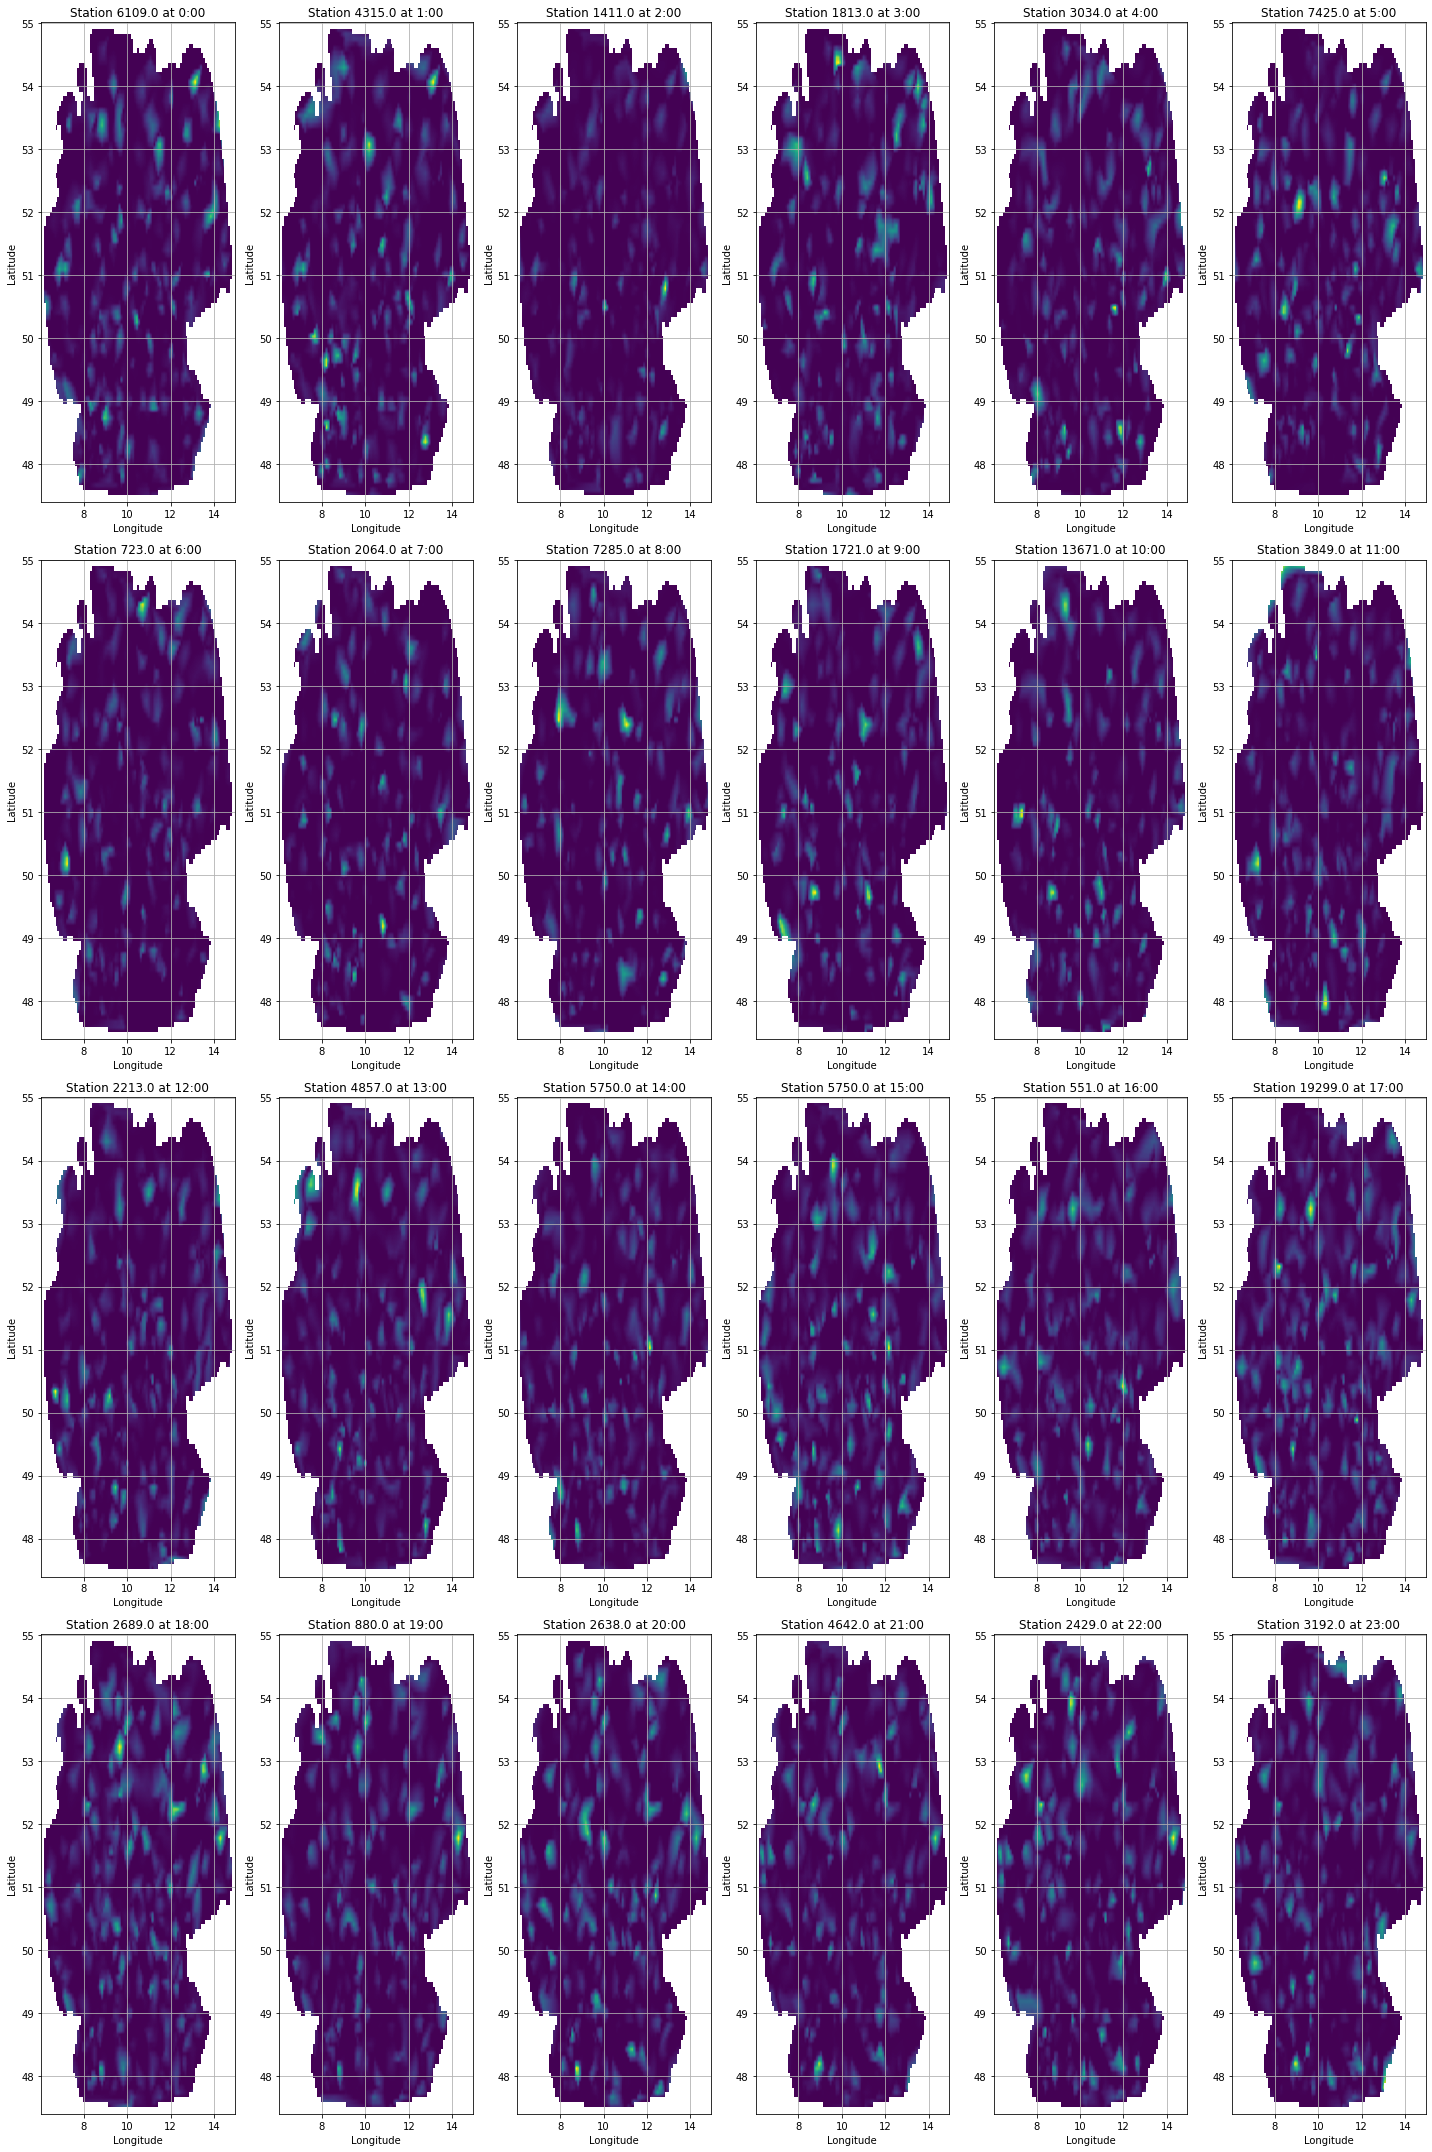

In [182]:
# Set up a larger figure to accommodate multiple subplots
fig, axs = plt.subplots(4, 6, figsize=(20, 30))

# Create a subplot for each selected hour
for hour in range(24):
    ax = axs.flatten()[hour]  
    
    hour_data = df_min_Processed_merged[df_min_Processed_merged['hour'] == hour]
    max_rain_station = hour_data.loc[hour_data['rain'].idxmax()]
    
    # Interpolate precipitation data to the grid
    interpolated_rain = griddata((hour_data['geoLaenge'], hour_data['geoBreite']), hour_data['rain'], (geolong, geolat), method='linear')    
    
    # Mask out regions where 'ind' is False as it is not part of the map
    interpolated_rain = np.ma.masked_where(~ind, interpolated_rain)
    
    im = ax.imshow(interpolated_rain, extent=(geolong.min(), geolong.max(), geolat.min(), geolat.max()), aspect='auto',origin = 'lower')
    ax.set_title(f'Station {max_rain_station["Stations_id"]} at {hour}:00')
    #ax.set_title(f'At {hour}:00')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
                        


# Show the plots
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()
